In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.decomposition import PCA

#### Set parameters for saving plots

In [2]:
plots_dir = Path("./Plots/DataAnalysis")
plots_dir.mkdir(exist_ok=True)

plt.rcParams.update(
    {
        # "text.usetex": True,
        "font.size": 14,
        "axes.titlesize": 14,
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
    }
)

### Plot Histogram

Dataset shape: (18000, 9)


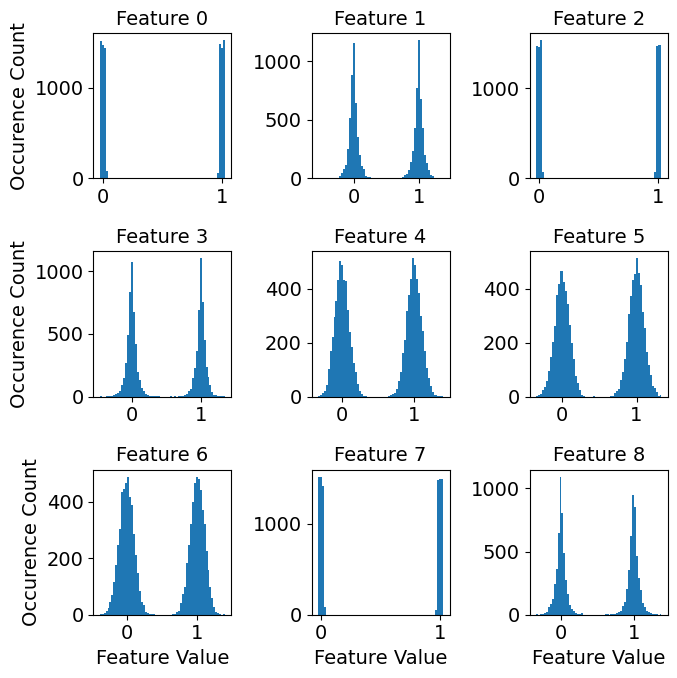

In [3]:
dimension = 9
nrows = 3
ncols = dimension // nrows
X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
print(f"Dataset shape: {X.shape}")

one_ids = np.where(Y == 1)[0]
zero_ids = np.where(Y == 0)[0]

X_ones = X[one_ids, :]
X_zeros = X[zero_ids, :]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 7))
# fig.suptitle(f"Histogram for dimension-{dimension} dataset features")

for row in range(nrows):
    for col in range(ncols):
        feat_id = row * ncols + col
        ax[row, col].hist(X_ones[:, feat_id], bins=64)
        ax[row, col].title.set_text(f"Feature {feat_id}")
        if row == 2:
            ax[row, col].set_xlabel("Feature Value")
        if col == 0:
            ax[row, col].set_ylabel("Occurence Count")

filename = plots_dir / f"n9_histogram.pdf"
plt.tight_layout()
plt.savefig(filename, bbox_inches="tight", format="pdf")

Dimension:9
Dataset shape: (18000, 9)


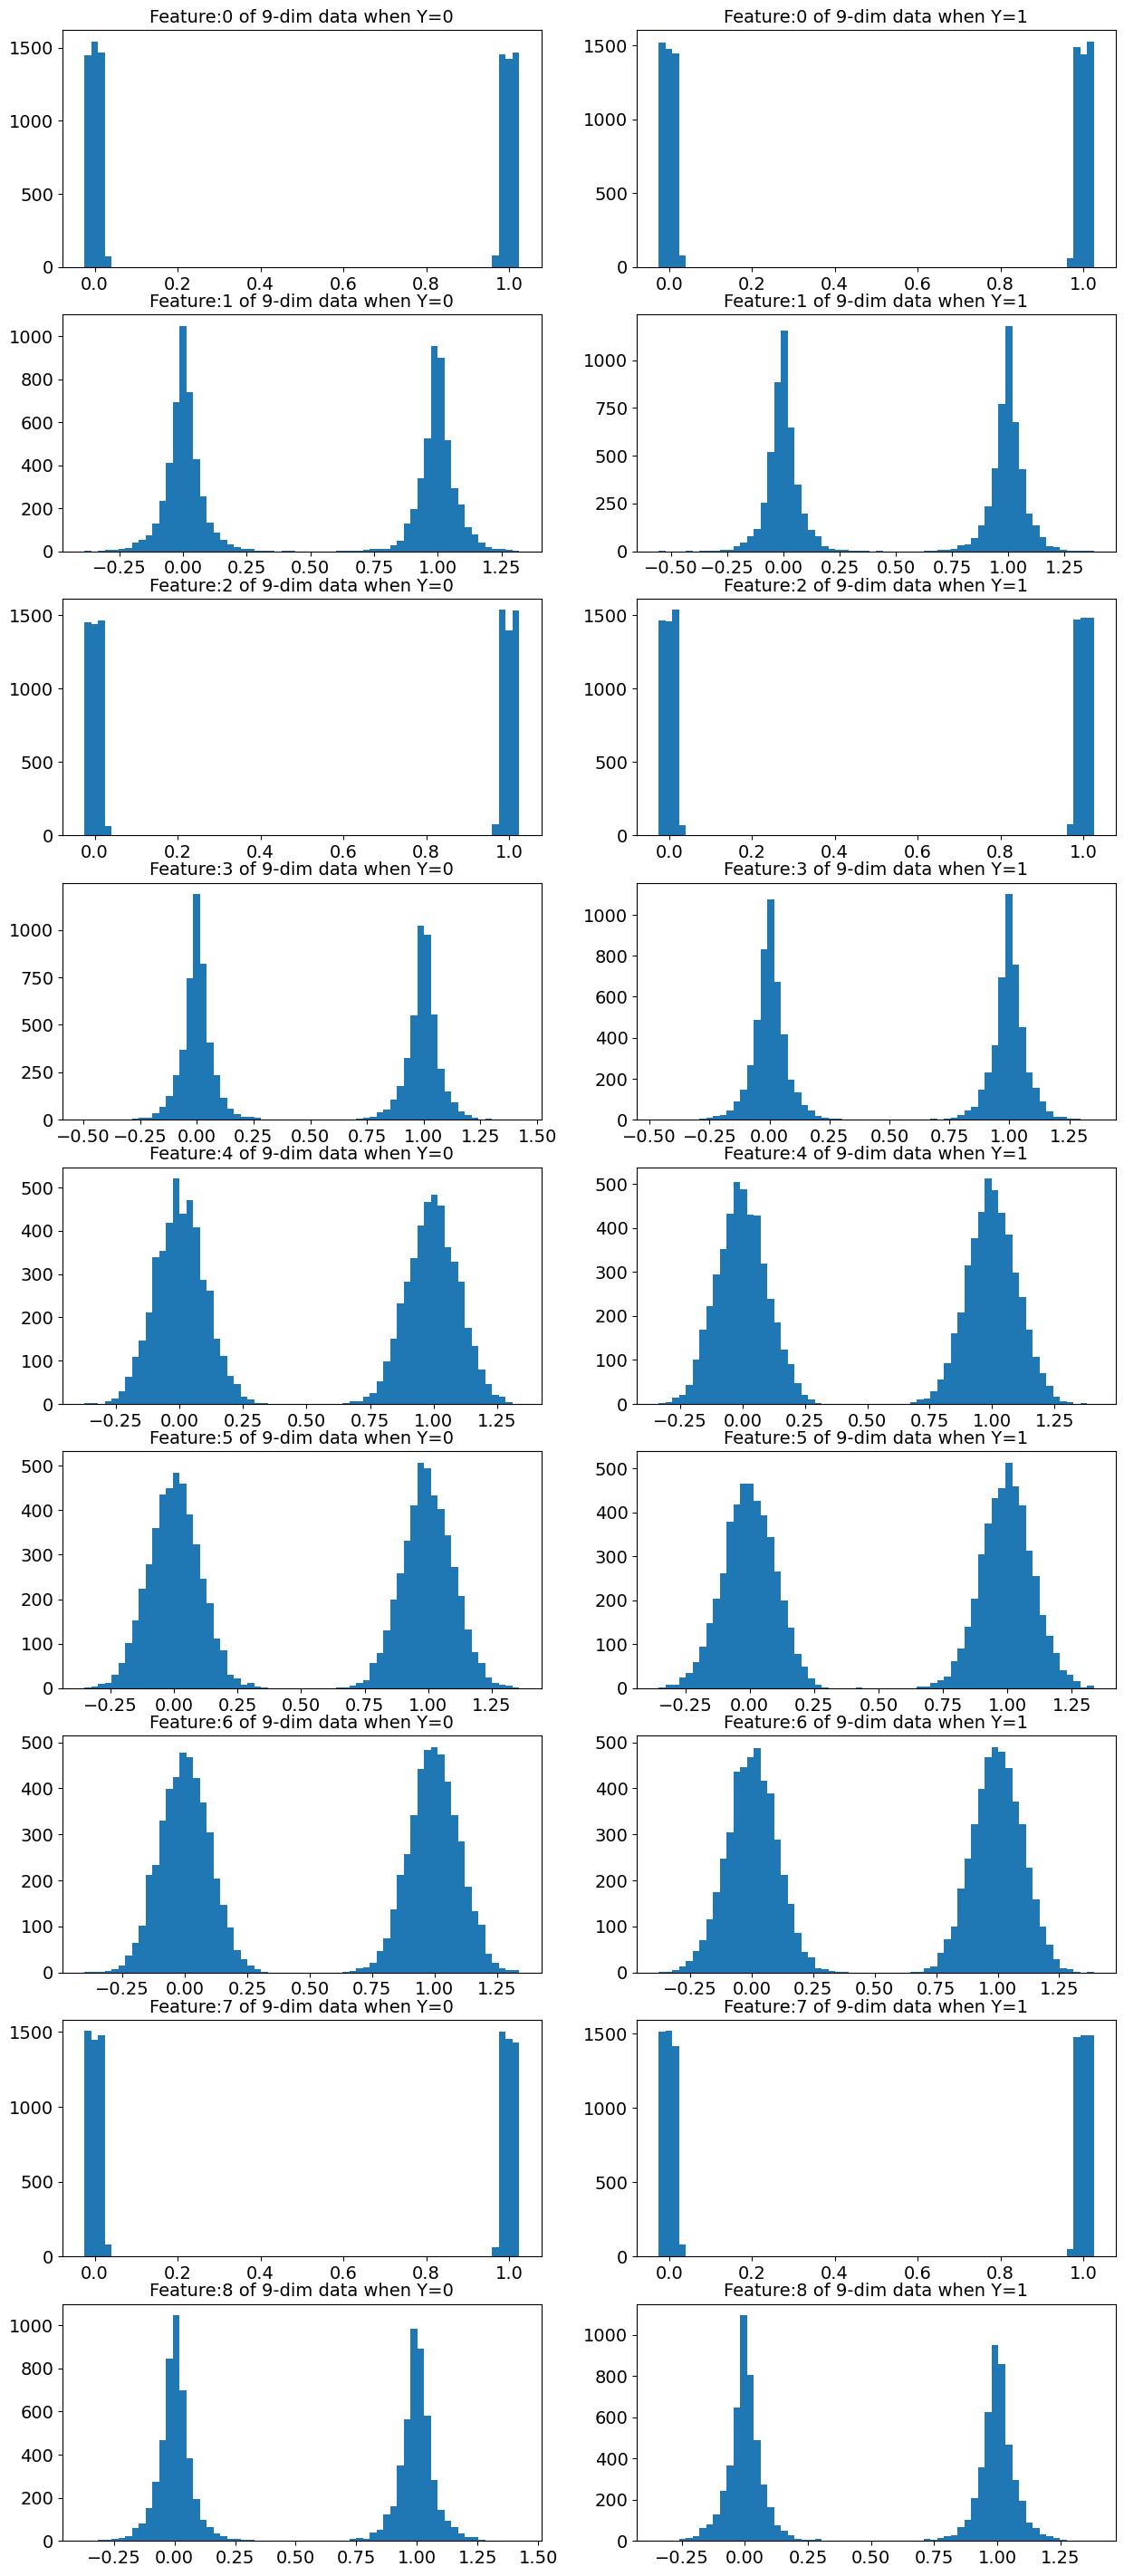

In [4]:
# Plot histogram for each label

dimensions = [9, 12, 15, 18, 24, 30, 45]

for dimension in [9]:  # dimensions:
    print("=" * 48)
    print(f"Dimension:{dimension}")

    X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
    print(f"Dataset shape: {X.shape}")

    one_ids = np.where(Y == 1)[0]
    zero_ids = np.where(Y == 0)[0]

    X_ones = X[one_ids, :]
    X_zeros = X[zero_ids, :]

    fig, ax = plt.subplots(nrows=dimension, ncols=2, figsize=(15, dimension * 4))
    # fig.suptitle(f"Histogram for dimension-{dimension} dataset features")

    for row in range(dimension):
        for col in range(2):
            if col == 0:
                ax[row, col].hist(X_zeros[:, row], bins=64)
            if col == 1:
                ax[row, col].hist(X_ones[:, row], bins=64)
            ax[row, col].title.set_text(
                f"Feature:{row} of {dimension}-dim data when Y={col}"
            )

### Plot 2 features 

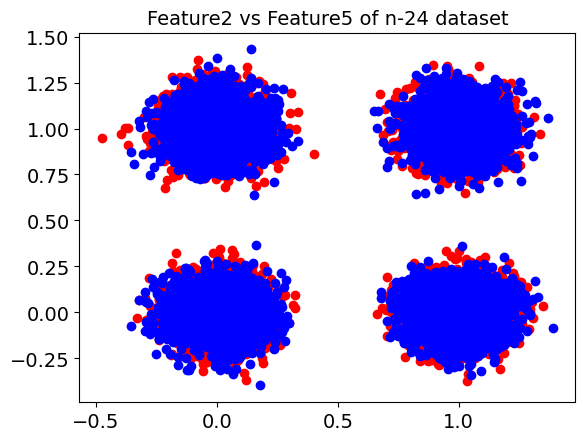

In [5]:
dimension = 24
X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")

n_elements_to_plot = 10000

one_ids = np.where(Y == 1)[0]
zero_ids = np.where(Y == 0)[0]

X_ones = X[one_ids, :]
X_zeros = X[zero_ids, :]

feature1_idx = 2
feature2_idx = 5
plt.scatter(
    X_ones[:n_elements_to_plot, feature1_idx],
    X_ones[:n_elements_to_plot, feature2_idx],
    c="r",
)
plt.scatter(
    X_zeros[:n_elements_to_plot, feature1_idx],
    X_zeros[:n_elements_to_plot, feature2_idx],
    c="b",
)
plt.title(f"Feature{feature1_idx} vs Feature{feature2_idx} of n-{dimension} dataset")
plt.show()

### Plot sum

Mean of feature sum Y=0: 12.014368057250977
Mean of feature sum Y=1: 11.985426902770996


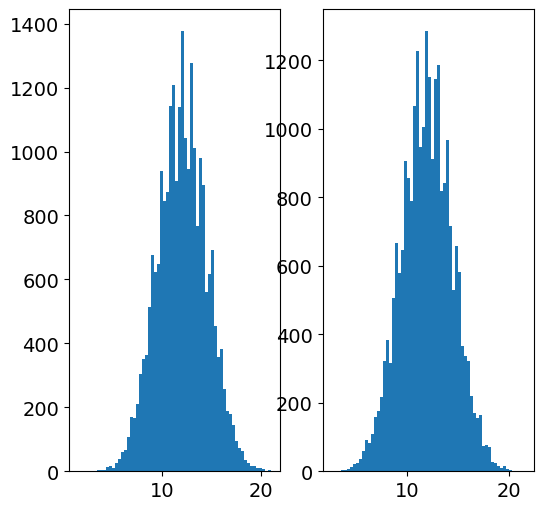

In [6]:
X0_flattened = np.sum(X_zeros, axis=1)
X1_flattened = np.sum(X_ones, axis=1)

pfig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

for col in range(2):
    if col == 0:
        ax[col].hist(X0_flattened, bins=64)
    if col == 1:
        ax[col].hist(X1_flattened, bins=64)
    # ax[row, col].title.set_text(f"Feature:{row} Y={col}")
print(f"Mean of feature sum Y=0: {np.mean(X0_flattened)}")
print(f"Mean of feature sum Y=1: {np.mean(X1_flattened)}")

### Singular value check

In [7]:
singular_values = []
dimensions = [9, 12, 15, 24, 30, 45]
for n in dimensions:
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{n}-y.npy")
    print(f"Dataset shape: {X.shape}")

    # Perform SVD
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    print(f"N:{n} S:{S}")
    singular_values.append(S)

Dataset shape: (18000, 9)
N:9 S:[212.07797   68.88446   68.35371   68.09474   67.628876  67.45177
  67.24188   67.05245   66.47136 ]
Dataset shape: (24000, 12)
N:12 S:[279.4213    79.85318   79.344894  79.04474   78.7651    78.218254
  78.13579   78.038574  77.548004  77.309715  77.19786   76.43244 ]
Dataset shape: (30000, 15)
N:15 S:[346.75403   89.43627   89.01632   88.68394   88.45461   87.963875
  87.783035  87.40816   87.35547   87.23582   86.94497   86.48675
  86.38618   86.24687   85.253914]
Dataset shape: (48000, 24)
N:24 S:[548.0493   113.12179  112.7516   112.67979  112.23401  112.16129
 111.919525 111.6866   111.67125  111.1161   111.08503  110.749176
 110.59346  110.32369  110.09461  109.74853  109.63561  109.45199
 109.35428  109.18085  108.92846  108.79763  108.56713  108.1057  ]
Dataset shape: (60000, 30)
N:30 S:[682.06604  126.39058  126.35929  126.1538   125.861275 125.557655
 125.17385  125.01586  124.89309  124.80968  124.47234  124.45271
 124.11731  123.97038  123.8

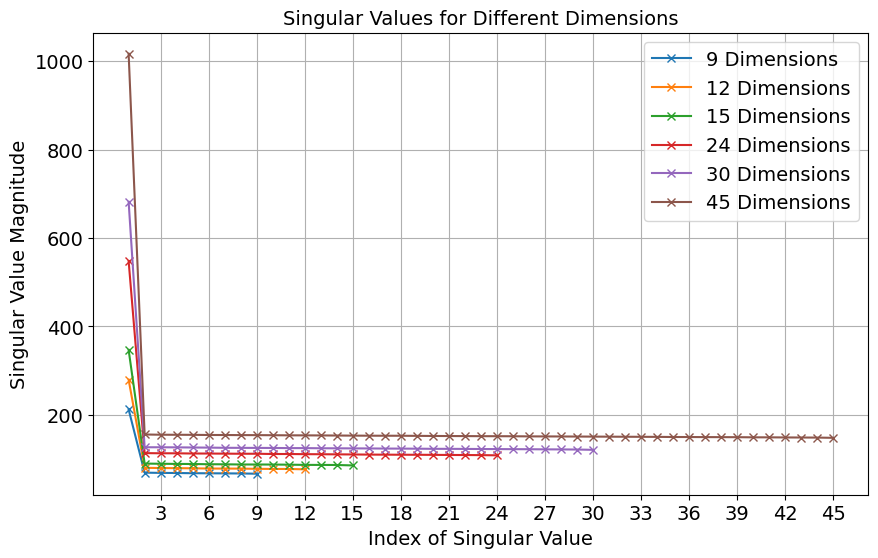

In [8]:
# Plot each set of singular values
plt.figure(figsize=(10, 6))
for sv, dim in zip(singular_values, dimensions):
    plt.plot(sv, marker="x", label=f"{dim} Dimensions")


max_length = max(len(sv) for sv in singular_values)
plt.xticks(
    ticks=range(2, max_length + 2, 3),
    labels=[f"{i+1}" for i in range(2, max_length + 2, 3)],
)

# Labels and title
plt.xlabel("Index of Singular Value")
# plt.xticks([dimensions])
plt.ylabel("Singular Value Magnitude")
plt.title("Singular Values for Different Dimensions")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Explained variance chceck

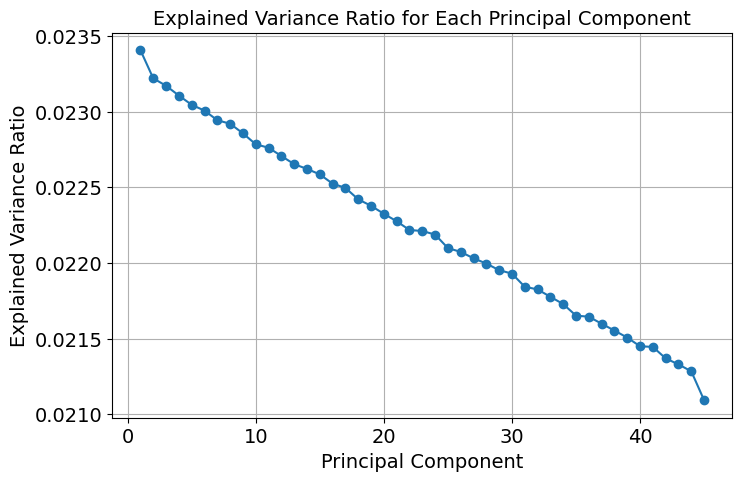

In [9]:
pca = PCA()
pca.fit(X)

# Explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker="o"
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Each Principal Component")
plt.grid(True)
plt.show()

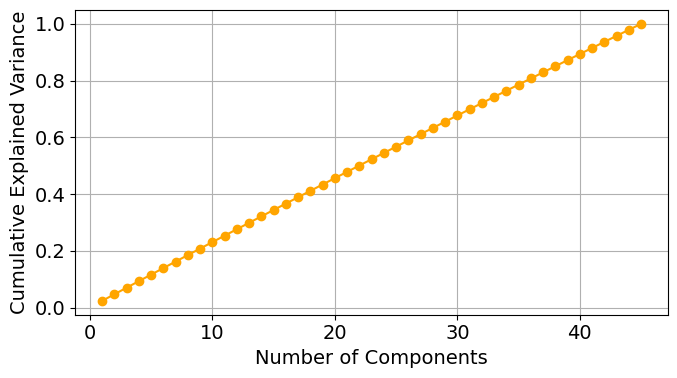

In [10]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance
plt.figure(figsize=(7, 4))
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    color="orange",
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
# plt.title('Cumulative Explained Variance for Each Component')
plt.grid(True)

filename = plots_dir / f"n9_cev.pdf"
plt.tight_layout()
plt.savefig(filename, bbox_inches="tight", format="pdf")
plt.show()

### Mutual Information

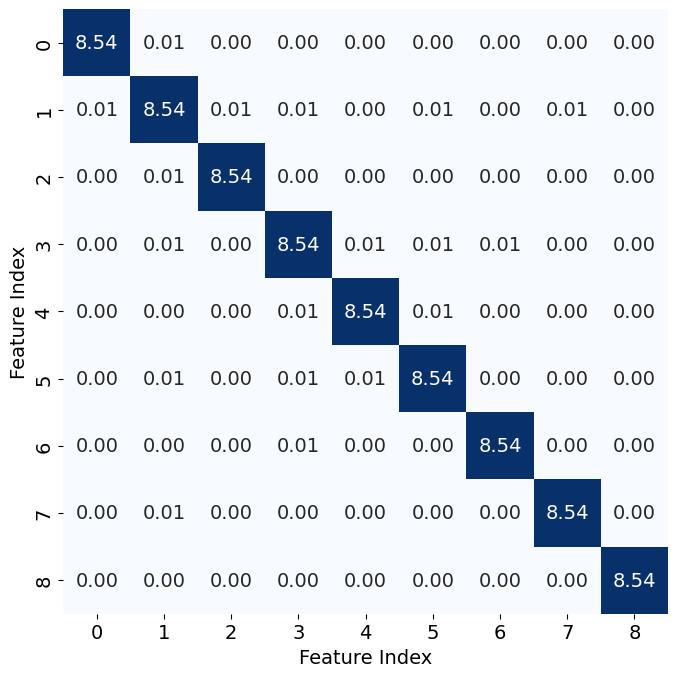

In [11]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression

n = 9
X = np.load(f"Datasets/kryptonite-{n}-X.npy")
Y = np.load(f"Datasets/kryptonite-{n}-y.npy")

pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

mi_arr = np.zeros((n, n))
for i in range(n):
    mi_arr[:, i] = mutual_info_regression(X, X[:, i])

plt.figure(figsize=(7, 7))
sns.heatmap(
    mi_arr,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=[f"{i}" for i in range(n)],
    yticklabels=[f"{i}" for i in range(n)],
    square=True,
    cbar=False,
)  # , ax=axs[0])

plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
# plt.title('Mutual Information Matrix')

filename = plots_dir / f"n9_mi.pdf"
plt.tight_layout()
plt.savefig(filename, bbox_inches="tight", format="pdf")
plt.show()

### Cluster/Corner label checking

Dimension:9 Dataset shape: (18000, 9)
Preprocessed shape: (18000, 9)
512 different groups in 18000 data, on average 35.16 points per cluster
Most common: [(np.int64(258), 55), (np.int64(310), 52), (np.int64(145), 52), (np.int64(359), 51), (np.int64(57), 51), (np.int64(475), 51), (np.int64(125), 50), (np.int64(342), 50), (np.int64(367), 49), (np.int64(20), 49), (np.int64(315), 49), (np.int64(74), 48), (np.int64(106), 48), (np.int64(305), 48), (np.int64(122), 48), (np.int64(66), 47), (np.int64(501), 47), (np.int64(250), 47), (np.int64(331), 47), (np.int64(4), 47), (np.int64(362), 47), (np.int64(270), 47), (np.int64(163), 46), (np.int64(505), 46), (np.int64(388), 46), (np.int64(196), 46), (np.int64(308), 46), (np.int64(281), 46), (np.int64(194), 46), (np.int64(65), 45), (np.int64(256), 45), (np.int64(312), 45), (np.int64(189), 45), (np.int64(103), 45), (np.int64(222), 45), (np.int64(373), 45), (np.int64(124), 45), (np.int64(454), 45), (np.int64(484), 45), (np.int64(237), 45), (np.int64(31

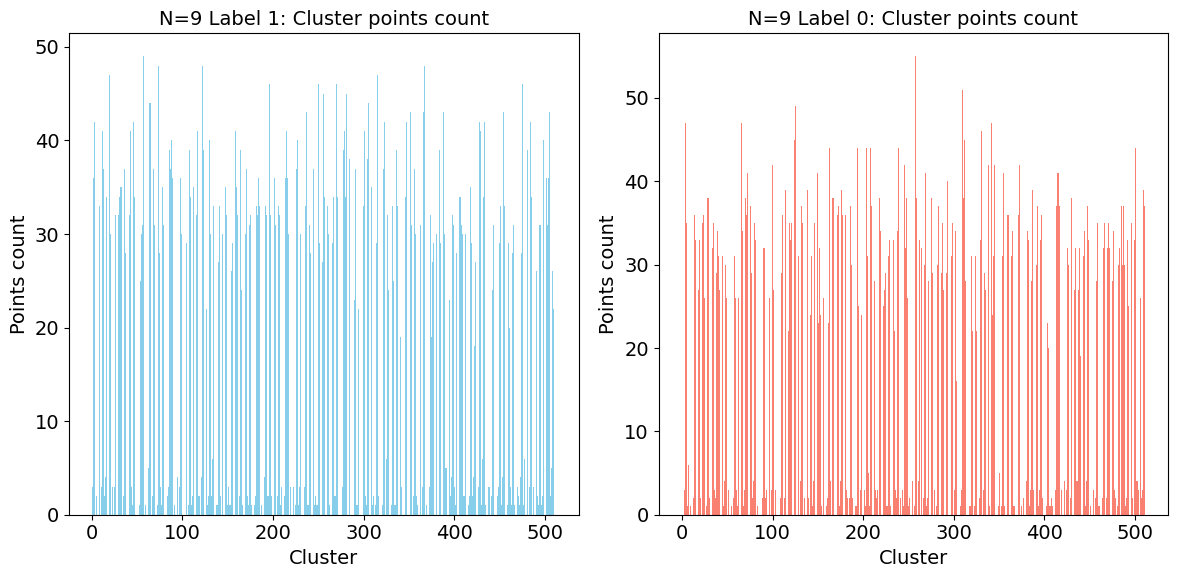

Dimension:12 Dataset shape: (24000, 12)
Preprocessed shape: (24000, 12)
4081 different groups in 24000 data, on average 5.88 points per cluster
Most common: [(np.int64(2610), 18), (np.int64(3191), 16), (np.int64(1008), 16), (np.int64(3939), 16), (np.int64(4000), 15), (np.int64(3837), 15), (np.int64(934), 14), (np.int64(3297), 14), (np.int64(1994), 14), (np.int64(1396), 14), (np.int64(566), 14), (np.int64(1273), 14), (np.int64(3166), 14), (np.int64(2785), 14), (np.int64(2637), 14), (np.int64(2912), 14), (np.int64(190), 13), (np.int64(603), 13), (np.int64(1372), 13), (np.int64(4019), 13), (np.int64(4048), 13), (np.int64(3880), 13), (np.int64(511), 13), (np.int64(3332), 13), (np.int64(2907), 13), (np.int64(2625), 13), (np.int64(810), 13), (np.int64(1552), 13), (np.int64(1211), 13), (np.int64(809), 13), (np.int64(816), 13), (np.int64(611), 13), (np.int64(2695), 13), (np.int64(1025), 13), (np.int64(3278), 13), (np.int64(1246), 13), (np.int64(1315), 13), (np.int64(2964), 13), (np.int64(672),

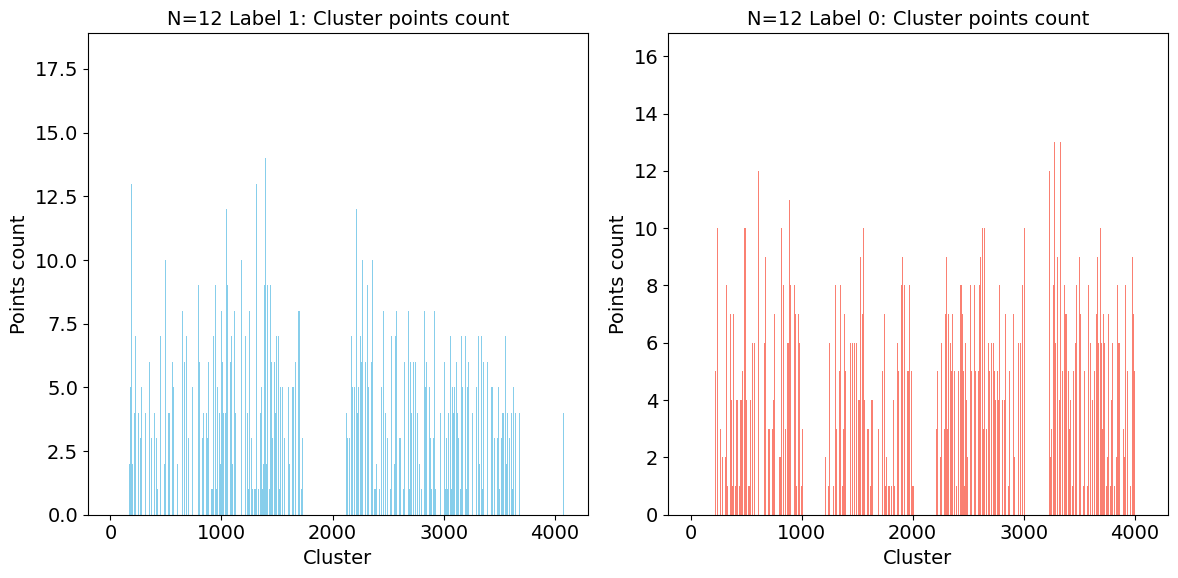

Dimension:15 Dataset shape: (30000, 15)
Preprocessed shape: (30000, 15)
19566 different groups in 30000 data, on average 1.53 points per cluster
Most common: [(np.int64(9788), 7), (np.int64(28836), 7), (np.int64(16370), 7), (np.int64(1153), 6), (np.int64(7718), 6), (np.int64(15950), 6), (np.int64(17958), 6), (np.int64(23913), 6), (np.int64(18557), 6), (np.int64(11410), 6), (np.int64(15370), 6), (np.int64(12834), 6), (np.int64(14533), 6), (np.int64(25006), 6), (np.int64(19128), 5), (np.int64(21286), 5), (np.int64(17106), 5), (np.int64(32647), 5), (np.int64(17934), 5), (np.int64(15546), 5), (np.int64(28785), 5), (np.int64(31454), 5), (np.int64(14946), 5), (np.int64(25352), 5), (np.int64(27311), 5), (np.int64(19616), 5), (np.int64(26485), 5), (np.int64(4344), 5), (np.int64(30739), 5), (np.int64(10840), 5), (np.int64(28834), 5), (np.int64(1265), 5), (np.int64(12448), 5), (np.int64(5426), 5), (np.int64(187), 5), (np.int64(4103), 5), (np.int64(28951), 5), (np.int64(8399), 5), (np.int64(16933

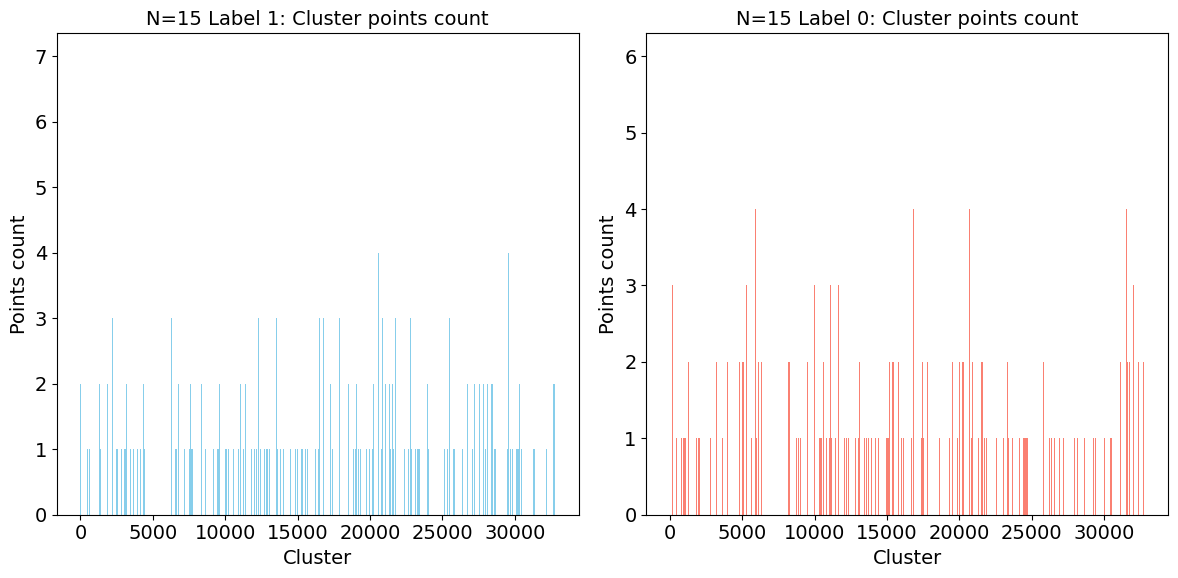

Dimension:18 Dataset shape: (36000, 18)
Preprocessed shape: (36000, 18)
33686 different groups in 36000 data, on average 1.07 points per cluster
Most common: [(np.int64(230465), 4), (np.int64(224362), 4), (np.int64(213459), 3), (np.int64(228747), 3), (np.int64(60992), 3), (np.int64(150994), 3), (np.int64(212799), 3), (np.int64(65784), 3), (np.int64(190982), 3), (np.int64(261780), 3), (np.int64(21573), 3), (np.int64(70289), 3), (np.int64(224455), 3), (np.int64(82293), 3), (np.int64(226496), 3), (np.int64(87741), 3), (np.int64(253212), 3), (np.int64(133533), 3), (np.int64(233203), 3), (np.int64(242911), 3), (np.int64(4840), 3), (np.int64(223226), 3), (np.int64(236530), 3), (np.int64(22508), 3), (np.int64(261277), 3), (np.int64(14593), 3), (np.int64(94739), 3), (np.int64(110351), 3), (np.int64(104830), 3), (np.int64(226948), 3), (np.int64(74309), 3), (np.int64(198071), 3), (np.int64(113919), 3), (np.int64(91781), 3), (np.int64(84401), 3), (np.int64(259030), 3), (np.int64(171597), 3), (np.

In [12]:
label_errors = []
data_pt_per_corners = []

for dimension in [9, 12, 15, 18, 24, 30, 45]:
    X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
    print("=" * 48)
    print(f"Dimension:{dimension} Dataset shape: {X.shape}")

    dim = X.shape[1]
    X_rounded = np.round(X).astype(int)
    X_rounded[X_rounded < 0] = 0
    print(f"Preprocessed shape: {X_rounded.shape}")
    X_dec = np.zeros(X.shape[0], dtype=int)
    for i in range(dim):
        X_dec += X_rounded[:, i] * (2**i)

    xd = X_dec.copy()

    one_ids = np.where(Y == 1)[0]
    zero_ids = np.where(Y == 0)[0]
    X_ones = xd[one_ids]
    X_zeros = xd[zero_ids]

    all_cntr = Counter(xd)
    n_per_cluster = xd.shape[0] / len(all_cntr.items())
    data_pt_per_corners.append(n_per_cluster)
    print(
        f"{len(all_cntr.items())} different groups in {xd.shape[0]} data, on average {n_per_cluster:.02f} points per cluster"
    )
    print(f"Most common: {all_cntr.most_common()}")
    cntr_ones = Counter(X_ones)
    # print(f"Counts for 1 label: {cntr_ones}")
    cntr_zeros = Counter(X_zeros)
    # print(f"Counts for 0 label: {cntr_zeros}")

    ones_set = set(X_ones)
    # print(f"Ones set: {ones_set}")
    zeros_set = set(X_zeros)
    # print(f"Zeros set: {zeros_set}")

    intersection_set = ones_set.intersection(zeros_set)
    print(f"Intersection set: {intersection_set}")
    intersectin_min_cnt = 0
    intersection_total = 0
    for val in intersection_set:
        intersectin_min_cnt += min(cntr_ones[val], cntr_zeros[val])
        intersection_total += cntr_ones[val] + cntr_zeros[val]
        # print(f" {val} has label 1 for {cntr_ones[val]} times, label 0 for {cntr_zeros[val]} times")
    if intersectin_min_cnt == 0:
        label_errors.append(0)
    else:
        label_errors.append(100.0 * intersectin_min_cnt / (2000 * dimension))
    # print(f"Intersection pct {intersectin_min_cnt}/{2000*dimension}")

    if dimension > 15:
        continue

    counter1 = Counter(X_ones)
    counter2 = Counter(X_zeros)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].bar(counter1.keys(), counter1.values(), color="skyblue")
    ax[0].set_xlabel("Cluster")
    ax[0].set_ylabel("Points count")
    ax[0].set_title(f"N={dimension} Label 1: Cluster points count")

    ax[1].bar(counter2.keys(), counter2.values(), color="salmon")
    ax[1].set_xlabel("Cluster")
    ax[1].set_ylabel("Points count")
    ax[1].set_title(f"N={dimension} Label 0: Cluster points count")

    plt.tight_layout()
    plt.show()

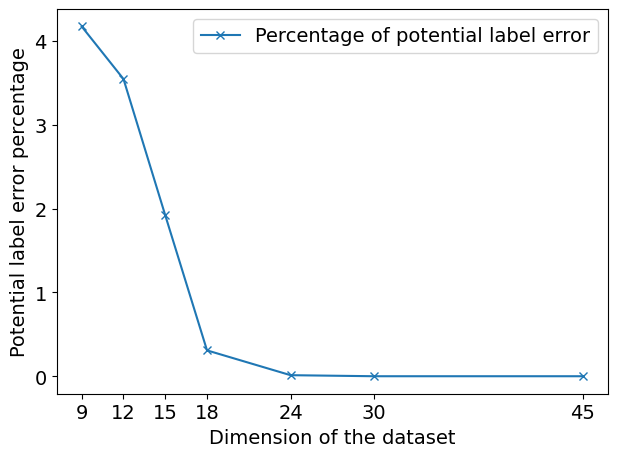

In [13]:
dimensions = [9, 12, 15, 18, 24, 30, 45]

plt.plot(
    dimensions, label_errors, marker="x", label=f"Percentage of potential label error"
)
plt.xlabel(f"Dimension of the dataset")
plt.ylabel(f"Potential label error percentage")
plt.legend()
plt.xticks(dimensions)

filename = plots_dir / f"label_error_est.pdf"
plt.tight_layout()
plt.savefig(filename, bbox_inches="tight", format="pdf")
plt.show()

### Dataset size vs Corners

Dim:9 n_data: 18000 n_corners:512
Dim:12 n_data: 24000 n_corners:4096
Dim:15 n_data: 30000 n_corners:32768
Dim:18 n_data: 36000 n_corners:262144
Dim:24 n_data: 48000 n_corners:16777216
Dim:30 n_data: 60000 n_corners:1073741824
Dim:45 n_data: 90000 n_corners:35184372088832


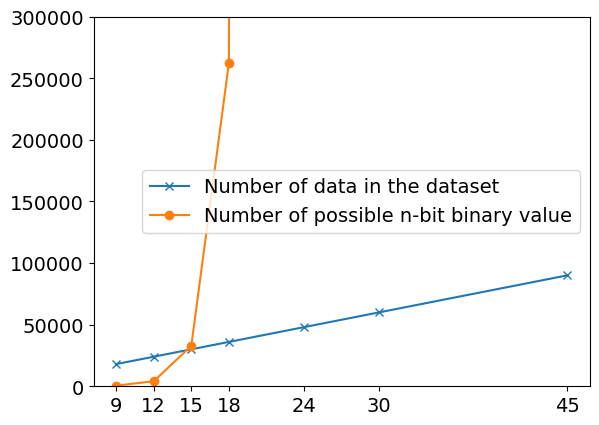

In [14]:
n_corners = []
n_dataset = []

dimensions = [9, 12, 15, 18, 24, 30, 45]
for dimension in [9, 12, 15, 18, 24, 30, 45]:
    n_corner = 2**dimension
    n_data = 2000 * dimension
    print(f"Dim:{dimension} n_data: {n_data} n_corners:{n_corner}")
    n_corners.append(n_corner)
    n_dataset.append(n_data)

plt.plot(dimensions, n_dataset, marker="x", label=f"Number of data in the dataset")
plt.plot(
    dimensions, n_corners, marker="o", label=f"Number of possible n-bit binary value"
)
plt.legend()
plt.ylim(0, 300000)
plt.xticks(dimensions)
plt.show()